In [1]:
data = '''0.78051,-0.063669,1
0.28774,0.29139,1
0.40714,0.17878,1
0.2923,0.4217,1
0.50922,0.35256,1
0.27785,0.10802,1
0.27527,0.33223,1
0.43999,0.31245,1
0.33557,0.42984,1
0.23448,0.24986,1
0.0084492,0.13658,1
0.12419,0.33595,1
0.25644,0.42624,1
0.4591,0.40426,1
0.44547,0.45117,1
0.42218,0.20118,1
0.49563,0.21445,1
0.30848,0.24306,1
0.39707,0.44438,1
0.32945,0.39217,1
0.40739,0.40271,1
0.3106,0.50702,1
0.49638,0.45384,1
0.10073,0.32053,1
0.69907,0.37307,1
0.29767,0.69648,1
0.15099,0.57341,1
0.16427,0.27759,1
0.33259,0.055964,1
0.53741,0.28637,1
0.19503,0.36879,1
0.40278,0.035148,1
0.21296,0.55169,1
0.48447,0.56991,1
0.25476,0.34596,1
0.21726,0.28641,1
0.67078,0.46538,1
0.3815,0.4622,1
0.53838,0.32774,1
0.4849,0.26071,1
0.37095,0.38809,1
0.54527,0.63911,1
0.32149,0.12007,1
0.42216,0.61666,1
0.10194,0.060408,1
0.15254,0.2168,1
0.45558,0.43769,1
0.28488,0.52142,1
0.27633,0.21264,1
0.39748,0.31902,1
0.5533,1,0
0.44274,0.59205,0
0.85176,0.6612,0
0.60436,0.86605,0
0.68243,0.48301,0
1,0.76815,0
0.72989,0.8107,0
0.67377,0.77975,0
0.78761,0.58177,0
0.71442,0.7668,0
0.49379,0.54226,0
0.78974,0.74233,0
0.67905,0.60921,0
0.6642,0.72519,0
0.79396,0.56789,0
0.70758,0.76022,0
0.59421,0.61857,0
0.49364,0.56224,0
0.77707,0.35025,0
0.79785,0.76921,0
0.70876,0.96764,0
0.69176,0.60865,0
0.66408,0.92075,0
0.65973,0.66666,0
0.64574,0.56845,0
0.89639,0.7085,0
0.85476,0.63167,0
0.62091,0.80424,0
0.79057,0.56108,0
0.58935,0.71582,0
0.56846,0.7406,0
0.65912,0.71548,0
0.70938,0.74041,0
0.59154,0.62927,0
0.45829,0.4641,0
0.79982,0.74847,0
0.60974,0.54757,0
0.68127,0.86985,0
0.76694,0.64736,0
0.69048,0.83058,0
0.68122,0.96541,0
0.73229,0.64245,0
0.76145,0.60138,0
0.58985,0.86955,0
0.73145,0.74516,0
0.77029,0.7014,0
0.73156,0.71782,0
0.44556,0.57991,0
0.85275,0.85987,0
0.51912,0.62359,0'''
lines = data.splitlines()
with open('data.csv', 'w') as f:
  for line in lines:
    f.write(line + '\n')  
    

In [ ]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    #sign = prediction(X, W, b)
    #W = W +  learn_rate * np.matmul(sign, X)
    #b = 1.0 * learn_rate * sign
    #return W, b
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b    

# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

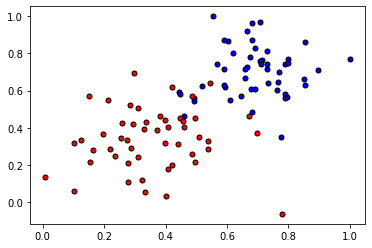

In [ ]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [ ]:
boundary = trainPerceptronAlgorithm(X, y, 0.01, 100)

100


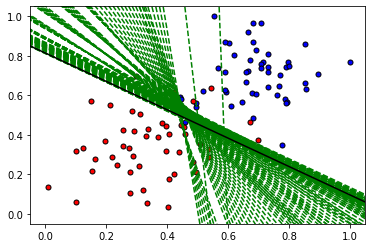

In [ ]:
print(len(boundary))
plot_points(X,y)
for m in boundary:
  display(m[0],m[1])
display(m[0], m[1], 'black')
plt.show()

In [ ]:
print(m)

(array([-0.71707002]), array([0.81368247]))


In [ ]:
X_new = X
Y = y

In [ ]:
import random

def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 

def sigmoid(b, w ,X_new):
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  

In [ ]:
def get_cost( y, y_hat):
    # return np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))
    return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))

In [ ]:
def update_beta (b_0, w_0 , y , y_hat, X_new, alpha):
    db = np.sum( y_hat - y)/ len(y) # 얼마만큼 틀렸는지 체크
    b_0 = b_0 - alpha * db # 그만큼 계산
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w_0 = w_0 - alpha * dw
   
   
    return b_0,w_0

In [ ]:
num_iterations = 500
alpha = 0.5

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of a and b are: ", -w[1]/w[0],-b/[w[0]])

initial guess of b and w:  0.2243240900393485 [0.52475643 0.43194502]
Iteration:  0 Cost:  31.31252648962785
Iteration:  10 Cost:  15.780662556571828
Iteration:  20 Cost:  13.761302699014454
Iteration:  30 Cost:  12.95649396821862
Iteration:  40 Cost:  12.345580174892389
Iteration:  50 Cost:  11.81329807241591
Iteration:  60 Cost:  11.33994682735648
Iteration:  70 Cost:  10.917122005732551
Iteration:  80 Cost:  10.53836685452581
Iteration:  90 Cost:  10.198105859241759
Iteration:  100 Cost:  9.891486337066404
Iteration:  110 Cost:  9.61430451371203
Iteration:  120 Cost:  9.362933023644187
Iteration:  130 Cost:  9.134248117932158
Iteration:  140 Cost:  8.925560844872187
Iteration:  150 Cost:  8.734554783398975
Iteration:  160 Cost:  8.55923127198674
Iteration:  170 Cost:  8.397862090873213
Iteration:  180 Cost:  8.248949049367157
Iteration:  190 Cost:  8.111189715449887
Iteration:  200 Cost:  7.983448474454831
Iteration:  210 Cost:  7.864732138803848
Iteration:  220 Cost:  7.75416940554